In [1]:
#IMPORT THIS HEADER
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import linregress
import pylab
import random as ran
%matplotlib inline

## Section II: Compiling Anharmonic Hamiltonian

In [2]:
#MODIFIED CLASS CODE TO GENERATE THE X4 MATRIX AND ADD IT TO THE ORIGINAL H.O. HAMILTONIAN MATRIX

def Eigengenerator(N, lam):
    
    H_0=np.zeros((N, N))
    x4matrix=np.zeros((N, N))
    
    for n in range(N):
        
        H_0[n][n]=n+0.5
    
    for n in range(N):
        
        for m in range(N):
            
            if n==m:
                x4matrix[n][m]=lam*1/4*(6*n**2+6*n+3)
            if n==m-2:
                x4matrix[n][m]=lam*np.sqrt((n+1)*(n+2))*(n+3/2)
            if n==m+2:
                x4matrix[n][m]=lam*np.sqrt(n*(n-1))*(n-1/2)
            if n==m-4:
                x4matrix[n][m]=lam*1/4*np.sqrt((n+1)*(n+2)*(n+3)*(n+4))
            if n==m+4:
                x4matrix[n][m]=lam*1/4*np.sqrt((n-3)*(n-2)*(n-1)*n)
                            
    H_lambda=H_0+x4matrix
    
    vals, vecs=np.linalg.eigh(H_lambda)
    
    #This bit of code makes sure that eigh doesn't return a negative eigenvector....this happens for some strange reason
    
    for i in range(N):
        if vecs[i][i]<0:
            vecs[:, i]=-vecs[:, i]
            
    return vals, vecs

In [3]:
print(Eigengenerator(5, 0.5)[1])
print(type(Eigengenerator(5, 0.5)[1]))

[[  9.83505473e-01  -0.00000000e+00   1.75204415e-01  -0.00000000e+00
    4.49488378e-02]
 [ -2.77555756e-17   9.59299358e-01   1.11022302e-16   2.82391116e-01
   -1.11022302e-16]
 [ -1.79112374e-01  -3.29264560e-16   9.08712155e-01  -5.58404737e-17
    3.77042408e-01]
 [  0.00000000e+00  -2.82391116e-01   0.00000000e+00   9.59299358e-01
    0.00000000e+00]
 [  2.52139392e-02   1.15540981e-16  -3.78874164e-01   5.19150149e-17
    9.25104656e-01]]
<class 'numpy.ndarray'>


## Section III: The Energy as a function of Lambda

In [4]:
#PLOTTING THE ENERGY EIGENVALUES VS LAMBDA

def plotEvslam(n, N):
    
    xlist=np.arange(0, 1.01, 0.01)
    Elist=[]
    
    for i in xlist:
        
        vals=Eigengenerator(N, i)[0]
        #select the value associated with the nth state
        Elist.append(vals[n])
        
    return plt.plot(xlist, Elist, label="n = "+str(n), color=(ran.random(), ran.random(), ran.random()))

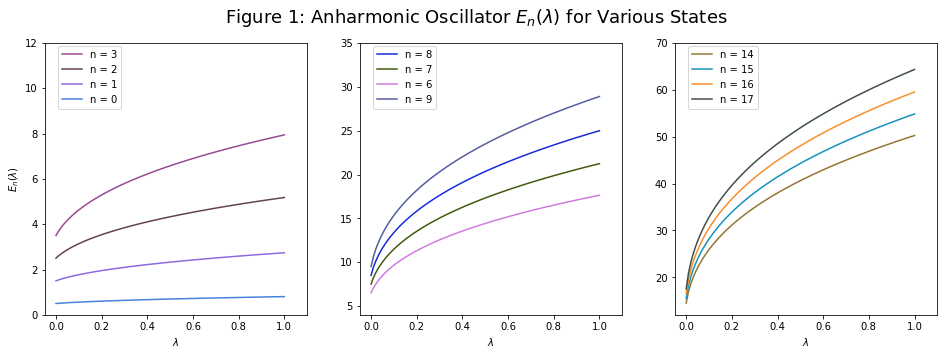

In [5]:
#PLOTTING THE ENERGY EIGENVALUES VS LAMBDA

plt.rcParams['figure.figsize']=16,5

#Plot of n=0,1,2,3

N=30
plt.subplot(1,3,1)
plotEvslam(3, N)
plotEvslam(2, N)
plotEvslam(1, N)
plotEvslam(0, N)

plt.axis([-0.05, 1.1, 0, 12])
plt.ylabel('$E_n(\lambda)$')
plt.xlabel('$\lambda$')
plt.legend(bbox_to_anchor=(0.05, 0.99), loc=2, borderaxespad=0.)

#Plot of n=6,7,8,9

N=100
plt.subplot(1,3,2)
plotEvslam(8, N)
plotEvslam(7, N)
plotEvslam(6, N)
plotEvslam(9, N)

plt.axis([-0.05, 1.1, 4, 35])
plt.xlabel('$\lambda$')
plt.legend(bbox_to_anchor=(0.05, 0.99), loc=2, borderaxespad=0.)

#Plot of n=14,15,16,17

N=100
plt.subplot(1,3,3)
plotEvslam(14, N)
plotEvslam(15, N)
plotEvslam(16, N)
plotEvslam(17, N)

plt.axis([-0.05, 1.1, 12, 70])
plt.xlabel('$\lambda$')
plt.legend(bbox_to_anchor=(0.05, 0.99), loc=2, borderaxespad=0.)

plt.suptitle("Figure 1: Anharmonic Oscillator $E_{n}(\lambda)$ for Various States", fontsize=18)

pylab.savefig('p2_1.jpg')

## Section IV: The Energy as a function of N

In [6]:
#PLOTTING THE ENERGY EIGENVALUES VS N

def plotEvsN(n, N, lam):
    
    xlist=range(n+1, N)
    Elist=[]
    
    for x in xlist:
        
        vals=Eigengenerator(x, lam)[0]
        #select the value associated w/ nth state
        Elist.append(vals[n])
        
    return plt.plot(xlist, Elist, label="n = "+str(n), color=(ran.random(), ran.random(), ran.random()))

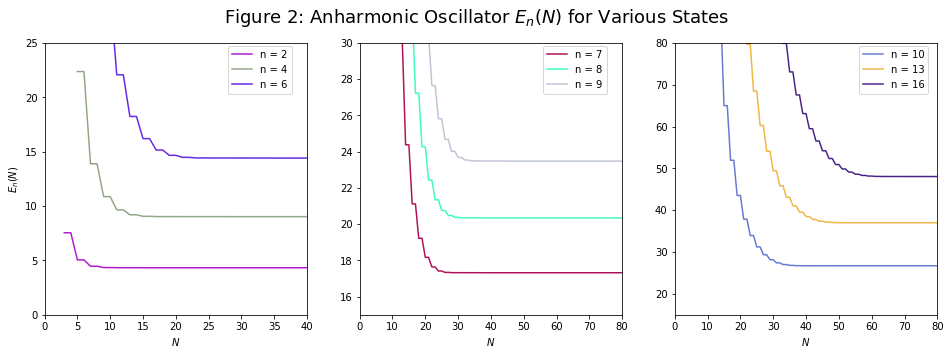

In [7]:
plt.rcParams['figure.figsize']=16,5

#Plot of n=2,4,6

N=50
lam=0.5

plt.subplot(1,3,1)
plotEvsN(2, N, lam)
plotEvsN(4, N, lam)
plotEvsN(6, N, lam)

plt.ylabel('$E_n(N)$')
plt.xlabel('$N$')
plt.legend(bbox_to_anchor=(0.7, 0.99), loc=2, borderaxespad=0.)
plt.axis([0, 40, 0, 25])

#Plot of n=7,8,9

N=100
lam=0.5

plt.subplot(1,3,2)
plotEvsN(7, N, lam)
plotEvsN(8, N, lam)
plotEvsN(9, N, lam)

plt.xlabel('$N$')
plt.legend(bbox_to_anchor=(0.7, 0.99), loc=2, borderaxespad=0.)
plt.axis([0, 80, 15, 30])

#Plot of n=10,13,16

N=100
lam=0.5

plt.subplot(1,3,3)
plotEvsN(10, N, lam)
plotEvsN(13, N, lam)
plotEvsN(16, N, lam)

plt.xlabel('$N$')
plt.legend(bbox_to_anchor=(0.7, 0.99), loc=2, borderaxespad=0.)
plt.axis([0, 80, 15, 80])

plt.suptitle("Figure 2: Anharmonic Oscillator $E_{n}(N)$ for Various States", fontsize=18)

pylab.savefig('p2_2.jpg')

## Section V: Energy Diff.

In [79]:
#PLOTTING THE ENERGY SPACING BETWEEN STATES
#HERE n IS THE HIGHER STATE, AND THE OUTPUT LIST CONTAINS THE ENERGY OF THE 

def plotEdiffvsN(n, N, lam):
    
    xlist=range(n+1, N)
    Edifflist=[]
    
    for x in xlist:
        
        vals=Eigengenerator(x, lam)[0]
        #select the value associated w/ nth state
        Edifflist.append(vals[n]-vals[n-1])
        
    return plt.plot(xlist, Edifflist, label="E"+str(n)+"-E"+str(n-1), color=(ran.random(), ran.random(), ran.random()))

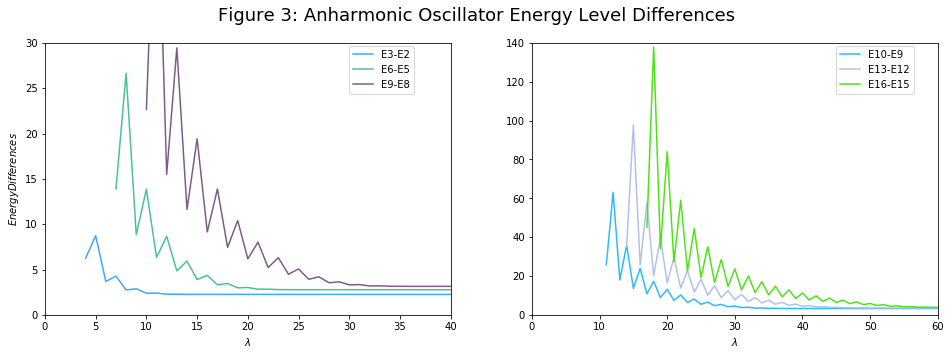

In [87]:
plt.rcParams['figure.figsize']=16,5

#Plot of n=7,8,9

N=100
lam=0.5

plt.subplot(1,2,1)
plotEdiffvsN(3, N, lam)
plotEdiffvsN(6, N, lam)
plotEdiffvsN(9, N, lam)

plt.xlabel('$\lambda$')
plt.ylabel('$Energy Differences$')
plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.axis([0, 40, 0, 30])

#Plot of n=10,13,16

N=100
lam=0.5

plt.subplot(1,2,2)
plotEdiffvsN(10, N, lam)
plotEdiffvsN(13, N, lam)
plotEdiffvsN(16, N, lam)

plt.xlabel('$\lambda$')
plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.axis([0, 60, 0, 140])

plt.suptitle("Figure 3: Anharmonic Oscillator Energy Level Differences", fontsize=18)

pylab.savefig('p2_3.jpg')

In [3]:
#HERMITE POLYNOMIAL GENERATOR, BASED ON X AND NUMBER OF POLYNOMIAL

def Hermgen(x, n):

    if n==0:

        return 1

    elif n==1:

        return 2*x

    else:

        return 2*x*Hermgen(x, n-1)-2*n*Hermgen(x, n-2)

In [81]:
#SHO WAVEFUNCTION GENERATOR THAT TAKES IN THE HERMITE POLYNOMIAL

def SHOwavefuncgen(x, n):
    
    return (((2**n)*np.math.factorial(n)*np.sqrt(np.pi))**(-1/2)*np.exp(-x**2/2)*Hermgen(x, n))

In [82]:
def SHOwfplotter(n):
    
    xlist=np.arange(-10, 10.1, 0.1)
    ylist=[]
    
    for x in xlist:
        
        ylist.append(SHOwavefuncgen(x, n))
        
    return plt.plot(xlist, ylist, label= 'Normal Harm. Oscillator')

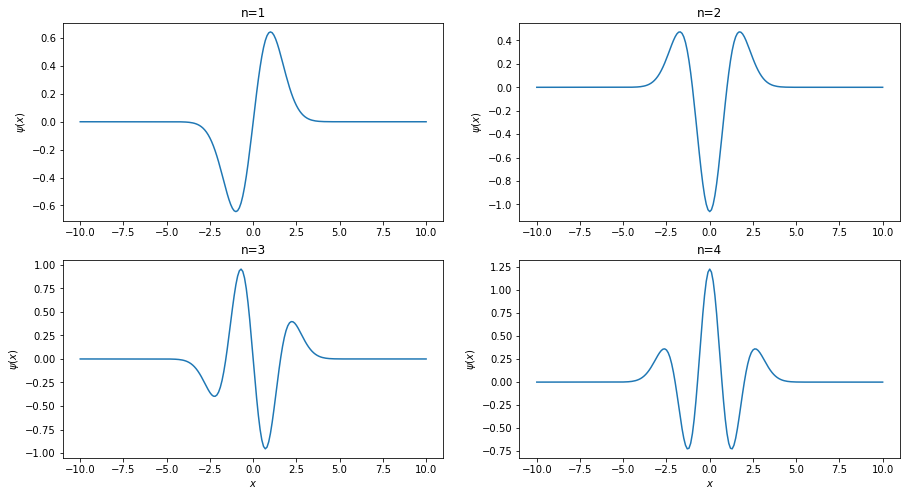

In [83]:
###PLOTTING SOME HO WAVEFUNCTIONS

plt.rcParams['figure.figsize']=15,8

plt.subplot(2,2,1)
SHOwfplotter(1)
plt.ylabel('$\psi(x)$')
plt.title('n=1')
           
plt.subplot(2,2,2)
SHOwfplotter(2)
plt.ylabel('$\psi(x)$')
plt.title('n=2')

plt.subplot(2,2,3)
SHOwfplotter(3)
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.title('n=3')

plt.subplot(2,2,4)
SHOwfplotter(4)
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.title('n=4')

pylab.savefig('p2_5.jpg')

In [84]:
def Anharmwfplotter(n, N, lam):
    
    xlist=np.arange(-10, 10.1, 0.1)
    ylist=[]
    
    Evectorarray=matrix_eigen(N, lam)[1]
    
    for x in xlist:
        theactualwf=0
        c1=0
        
        #This bit adds on each SHO wavefunction according to the nth evector and the SHO wf generator code 
        for c in Evectorarray[:,n]:
            theactualwf+=c*SHOwavefuncgen(x, c1)
            c1+=1
            
        ylist.append(theactualwf)
        
    return plt.plot(xlist, ylist, label='Anharmonic, Basis Size:'+str(N), color=(ran.random(), ran.random(), ran.random()))

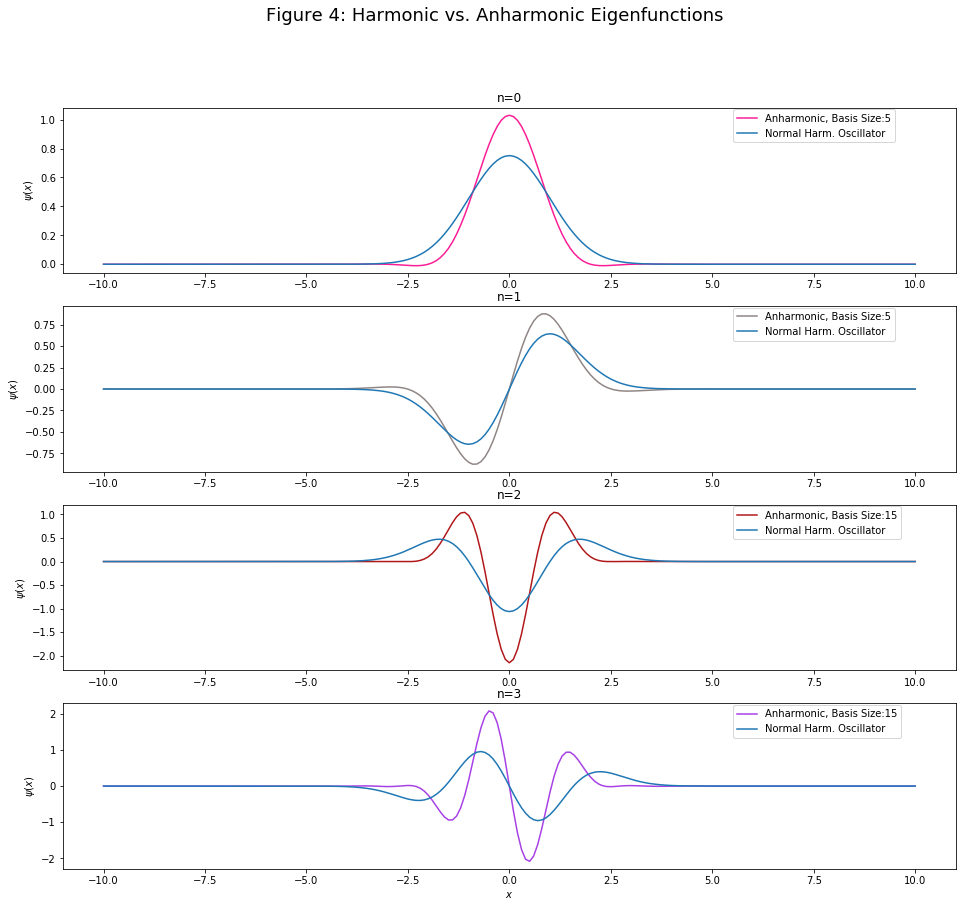

In [89]:
#PLOTTING THE ANHARMONIC WAVE FUNCTIONS OVER VARIOUS VALUES OF LAMBDA

plt.rcParams['figure.figsize']=16,14

plt.subplot(4,1,1)

Anharmwfplotter(0, 5, 1)
SHOwfplotter(0)

plt.ylabel('$\psi(x)$')

plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.title('n=0')

plt.subplot(4,1,2)

Anharmwfplotter(1, 5, 1)
SHOwfplotter(1)

plt.ylabel('$\psi(x)$')

plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.title('n=1')

plt.subplot(4,1,3)

Anharmwfplotter(2, 15, 1)
SHOwfplotter(2)

plt.ylabel('$\psi(x)$')

plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.title('n=2')

plt.subplot(4,1,4)

Anharmwfplotter(3, 15, 1)
SHOwfplotter(3)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')

plt.legend(bbox_to_anchor=(0.75, 0.99), loc=2, borderaxespad=0.)
plt.title('n=3')

plt.suptitle("Figure 4: Harmonic vs. Anharmonic Eigenfunctions", fontsize=18)

pylab.savefig('p2_4.jpg')